## 6.1 Create a table/data frame with the closing prices of 30 different stocks, with 10 from each of the caps 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### Lets create a funtion to extract the name of company and closing price

In [2]:
def get_close(comp):
    cp = pd.read_csv(comp)
    return cp['Close Price']

In [3]:
def comp_name(paths):
    table ={}
    for file in paths:
        table[file.split('/')[2].split('.')[0]] = get_close(file)
    return table

In [4]:
paths = ['stock_data/Large_Cap/ADANIPORTS.csv','stock_data/Large_Cap/ASIANPAINT.csv','stock_data/Large_Cap/BPCL.csv','stock_data/Large_Cap/GAIL.csv',
        'stock_data/Large_Cap/ITC.csv','stock_data/Large_Cap/IOC.csv','stock_data/Large_Cap/INFRATEL.csv','stock_data/Large_Cap/HINDALCO.csv',
        'stock_data/Large_Cap/MARUTI.csv','stock_data/Large_Cap/TCS.csv',
        'stock_data/Mid_Cap/AJANTPHARM.csv','stock_data/Mid_Cap/APOLLOTYRE.csv','stock_data/Mid_Cap/BERGEPAINT.csv','stock_data/Mid_Cap/CASTROLIND.csv',
        'stock_data/Mid_Cap/NBCC.csv','stock_data/Mid_Cap/MRPL.csv','stock_data/Mid_Cap/JUBLFOOD.csv','stock_data/Mid_Cap/GODREJIND.csv',
        'stock_data/Mid_Cap/TATAPOWER.csv','stock_data/Mid_Cap/VOLTAS.csv',
        'stock_data/Small_Cap/ASHOKA.csv','stock_data/Small_Cap/FORTIS.csv','stock_data/Small_Cap/LAXMIMACH.csv','stock_data/Small_Cap/JETAIRWAYS.csv',
        'stock_data/Small_Cap/SUZLON.csv','stock_data/Small_Cap/RCOM.csv','stock_data/Small_Cap/PVR.csv','stock_data/Small_Cap/LUXIND.csv',
        'stock_data/Small_Cap/VIPIND.csv','stock_data/Small_Cap/JKLAKSHMI.csv']

In [5]:
dict_table =comp_name(paths)

In [6]:
df_stocks = pd.DataFrame(dict_table)

In [7]:
df_stocks.head()

,ADANIPORTS,ASIANPAINT,BPCL,GAIL,ITC,IOC,INFRATEL,HINDALCO,MARUTI,TCS,...,ASHOKA,FORTIS,LAXMIMACH,JETAIRWAYS,SUZLON,RCOM,PVR,LUXIND,VIPIND,JKLAKSHMI
0,356.20,1148.05,727.85,414.00,277.95,442.10,371.05,198.45,6823.90,2365.10,...,216.05,205.25,4614.05,527.50,19.6,32.00,1524.95,819.60,199.20,510.80
1,354.50,1142.85,733.30,411.40,283.45,446.60,376.55,196.50,6953.95,2429.15,...,214.90,207.90,4589.80,534.15,19.7,32.10,1539.00,817.50,200.90,527.50
2,348.55,1154.95,727.45,408.30,281.65,444.25,389.90,198.85,6958.20,2455.35,...,217.00,205.90,4637.25,528.90,19.9,31.95,1530.30,819.80,199.65,516.20
3,347.90,1151.35,714.90,404.75,277.90,439.90,378.90,194.00,6831.05,2536.20,...,209.65,196.85,4544.45,522.70,20.0,31.05,1515.05,820.05,193.30,478.95
4,349.45,1123.15,702.45,401.05,286.20,435.40,378.95,191.00,6790.55,2507.15,...,206.25,203.55,4522.70,520.40,20.6,30.55,1513.55,817.80,195.95,469.55


In [8]:
for key in dict_table.keys():
    print(key, len(dict_table[key]))

ADANIPORTS 495
ASIANPAINT 495
BPCL 495
GAIL 494
ITC 496
IOC 495
INFRATEL 494
HINDALCO 495
MARUTI 496
TCS 498
AJANTPHARM 494
APOLLOTYRE 494
BERGEPAINT 494
CASTROLIND 495
NBCC 494
MRPL 494
JUBLFOOD 495
GODREJIND 494
TATAPOWER 495
VOLTAS 494
ASHOKA 494
FORTIS 495
LAXMIMACH 494
JETAIRWAYS 494
SUZLON 494
RCOM 494
PVR 495
LUXIND 494
VIPIND 494
JKLAKSHMI 494


*In above companies, TCS is the company having the most number of values(498) and every stock's date start from 15-may-2017.Thus, using its date column to generalize*

In [9]:
df_stocks.insert(0, "Date", value = pd.read_csv('stock_data/Large_Cap/TCS.csv')['Date'].values)

In [10]:
df_stocks.Date = pd.to_datetime(df_stocks.Date)

In [11]:
df_stocks.head()

,Date,ADANIPORTS,ASIANPAINT,BPCL,GAIL,ITC,IOC,INFRATEL,HINDALCO,MARUTI,...,ASHOKA,FORTIS,LAXMIMACH,JETAIRWAYS,SUZLON,RCOM,PVR,LUXIND,VIPIND,JKLAKSHMI
0,2017-05-15,356.20,1148.05,727.85,414.00,277.95,442.10,371.05,198.45,6823.90,...,216.05,205.25,4614.05,527.50,19.6,32.00,1524.95,819.60,199.20,510.80
1,2017-05-16,354.50,1142.85,733.30,411.40,283.45,446.60,376.55,196.50,6953.95,...,214.90,207.90,4589.80,534.15,19.7,32.10,1539.00,817.50,200.90,527.50
2,2017-05-17,348.55,1154.95,727.45,408.30,281.65,444.25,389.90,198.85,6958.20,...,217.00,205.90,4637.25,528.90,19.9,31.95,1530.30,819.80,199.65,516.20
3,2017-05-18,347.90,1151.35,714.90,404.75,277.90,439.90,378.90,194.00,6831.05,...,209.65,196.85,4544.45,522.70,20.0,31.05,1515.05,820.05,193.30,478.95
4,2017-05-19,349.45,1123.15,702.45,401.05,286.20,435.40,378.95,191.00,6790.55,...,206.25,203.55,4522.70,520.40,20.6,30.55,1513.55,817.80,195.95,469.55


## 6.2 Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period 

In **module 5**, we calculated the annual returns and annual volatility. So, using same concept in **module 6-**

In [12]:
stock_names = list(dict_table.keys())

In [13]:
stock_names

['ADANIPORTS',
 'ASIANPAINT',
 'BPCL',
 'GAIL',
 'ITC',
 'IOC',
 'INFRATEL',
 'HINDALCO',
 'MARUTI',
 'TCS',
 'AJANTPHARM',
 'APOLLOTYRE',
 'BERGEPAINT',
 'CASTROLIND',
 'NBCC',
 'MRPL',
 'JUBLFOOD',
 'GODREJIND',
 'TATAPOWER',
 'VOLTAS',
 'ASHOKA',
 'FORTIS',
 'LAXMIMACH',
 'JETAIRWAYS',
 'SUZLON',
 'RCOM',
 'PVR',
 'LUXIND',
 'VIPIND',
 'JKLAKSHMI']

In [14]:
def get_return_and_vol(data, stock_names):
    stock_return ={}
    for stock in stock_names:
        ret = data[stock].pct_change()*100
        stock_return[stock] = (ret.values[1:494].mean()*252, ret.values[1:494].std()*np.sqrt(252))
    return stock_return

In [15]:
annual_return_vol = get_return_and_vol(df_stocks, stock_names)

In [16]:
annual_return_vol

{'ADANIPORTS': (7.12004698251904, 30.906499397861417),
 'ASIANPAINT': (10.12485033932951, 20.919339154597132),
 'BPCL': (-25.03643186577684, 43.57326913943593),
 'GAIL': (-5.255090331466202, 33.808128039061934),
 'ITC': (6.401436738684057, 22.36362835395958),
 'IOC': (-39.63857543056539, 49.900680433732994),
 'INFRATEL': (-12.418651088299297, 30.57124746900802),
 'HINDALCO': (4.933316414764509, 33.52289502614842),
 'MARUTI': (1.0195035509752408, 22.50294299095487),
 'TCS': (8.046955952490926, 43.0949399356011),
 'AJANTPHARM': (-17.38913852221259, 33.18342455257983),
 'APOLLOTYRE': (-6.430261138823607, 31.012956169177755),
 'BERGEPAINT': (10.893463488238023, 26.73962348913112),
 'CASTROLIND': (-43.455744584736706, 44.601281189820554),
 'NBCC': (-51.51760133701396, 50.815626117984294),
 'MRPL': (-32.295702537440796, 36.55265690482999),
 'JUBLFOOD': (26.751441266829488, 50.049531520744544),
 'GODREJIND': (-9.02500738644092, 26.637939531295483),
 'TATAPOWER': (-9.09497443251133, 30.7983935

In [17]:
returns = np.array([a[0] for a in annual_return_vol.values()])
volatility = np.array([a[1] for a in annual_return_vol.values()])

In [18]:
df_return = pd.DataFrame({'Companies':list(annual_return_vol.keys()), 'Annual % returns': returns, 'Annual % volatility':volatility})

In [19]:
df_return

,Companies,Annual % returns,Annual % volatility
0,ADANIPORTS,7.120047,30.906499
1,ASIANPAINT,10.124850,20.919339
2,BPCL,-25.036432,43.573269
3,GAIL,-5.255090,33.808128
4,ITC,6.401437,22.363628
5,IOC,-39.638575,49.900680
6,INFRATEL,-12.418651,30.571247
7,HINDALCO,4.933316,33.522895
8,MARUTI,1.019504,22.502943
9,TCS,8.046956,43.094940


In [20]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = 16,7

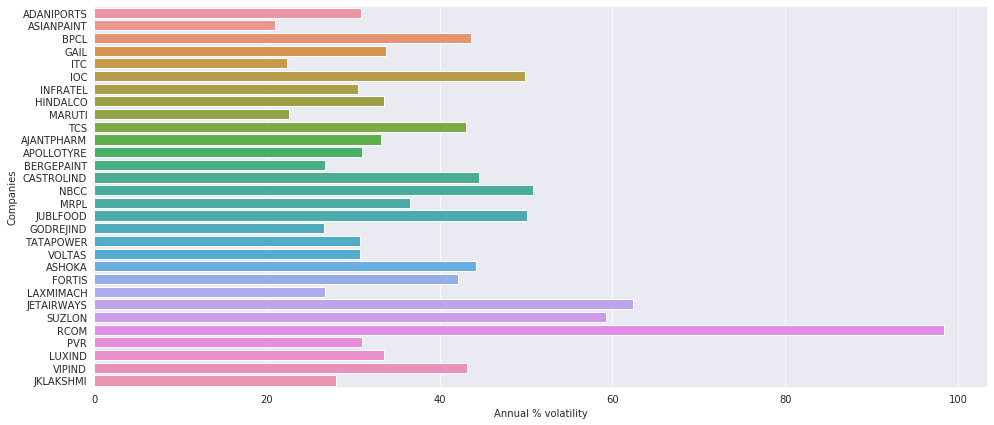

In [21]:
ax = sns.barplot(x ='Annual % volatility', y='Companies', data =df_return)

## 6.3 Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method 

In [22]:
from sklearn.cluster import KMeans

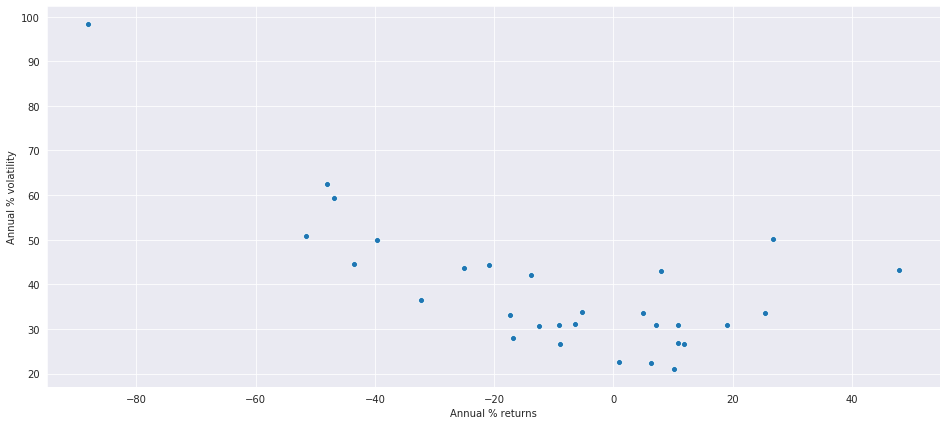

In [23]:
sns.scatterplot(x='Annual % returns', y='Annual % volatility', data =df_return)

In [24]:
kmeans = KMeans(n_clusters =4)

In [25]:
df_return['Cluster'] = kmeans.fit_predict(df_return[['Annual % returns', 'Annual % volatility']])
df_return.head()

,Companies,Annual % returns,Annual % volatility,Cluster
0,ADANIPORTS,7.120047,30.906499,1
1,ASIANPAINT,10.124850,20.919339,1
2,BPCL,-25.036432,43.573269,0
3,GAIL,-5.255090,33.808128,0
4,ITC,6.401437,22.363628,1


In [26]:
centroids = kmeans.cluster_centers_

In [27]:
centroids

array([[-15.31021174,  34.58495285],
       [ 14.66290961,  31.94353659],
       [-88.17286291,  98.43662692],
       [-45.90579356,  53.40698895]])

In [28]:
for i in range(len(centroids)):
    print(centroids[i][0], centroids[i][1])

-15.31021174234842 34.58495285284322
14.662909606520428 31.94353658882052
-88.17286291308469 98.43662692353006
-45.90579355661715 53.40698894570714


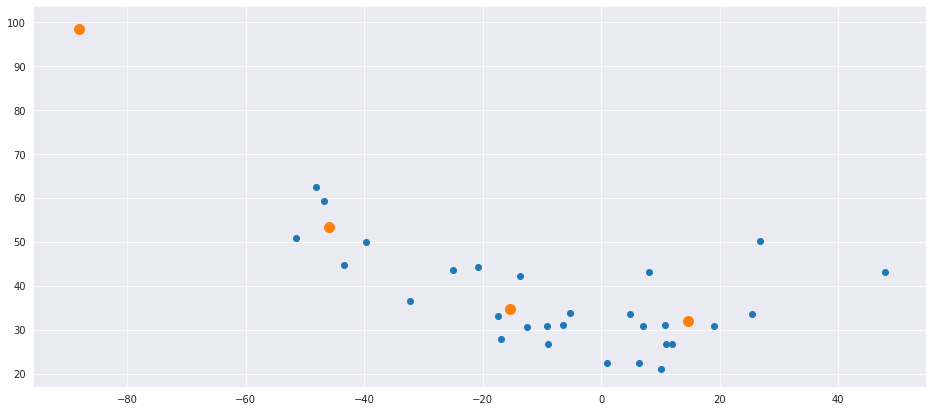

In [29]:
plt.scatter(x ='Annual % returns', y= 'Annual % volatility', data = df_return)

plt.scatter(centroids[:,0], centroids[:,1], s=100)

More visualization of data points and cluster

In [30]:
cl1 = df_return[df_return.Cluster == 0]
cl2 = df_return[df_return.Cluster == 1]
cl3 = df_return[df_return.Cluster == 2]
cl4 = df_return[df_return.Cluster == 3]

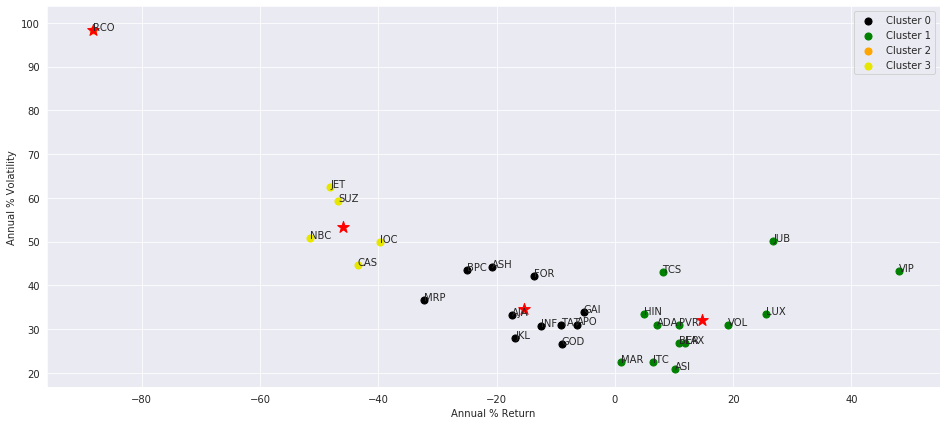

In [31]:
plt.scatter(cl1['Annual % returns'], cl1['Annual % volatility'], label ='Cluster 0', s =50, color ='black')
plt.scatter(cl2['Annual % returns'], cl2['Annual % volatility'], label ='Cluster 1', s =50, color ='green')
plt.scatter(cl3['Annual % returns'], cl3['Annual % volatility'], label ='Cluster 2', s =50, color ='orange')
plt.scatter(cl4['Annual % returns'], cl4['Annual % volatility'], s =50, color ='#e6e600', label ='Cluster 3')

plt.scatter(centroids[:,0], centroids[:,1], s=150, marker ='*', color ='red')

for i,txt in enumerate(stock_names):
    plt.annotate(txt[:3], (returns[i], volatility[i]))
plt.xlabel('Annual % Return')
plt.ylabel('Annual % Volatility')
plt.legend()

### Optimization in KMeans using Elbow Method-

In [32]:
squ_err =[]
K =range(1,10)
for k in K:
    kmean_model = KMeans(n_clusters = k)
    kmean_model.fit(df_return[['Annual % returns', 'Annual % volatility']])
    squ_err.append(kmean_model.inertia_)

Text(0, 0.5, 'Sum of squared errors')

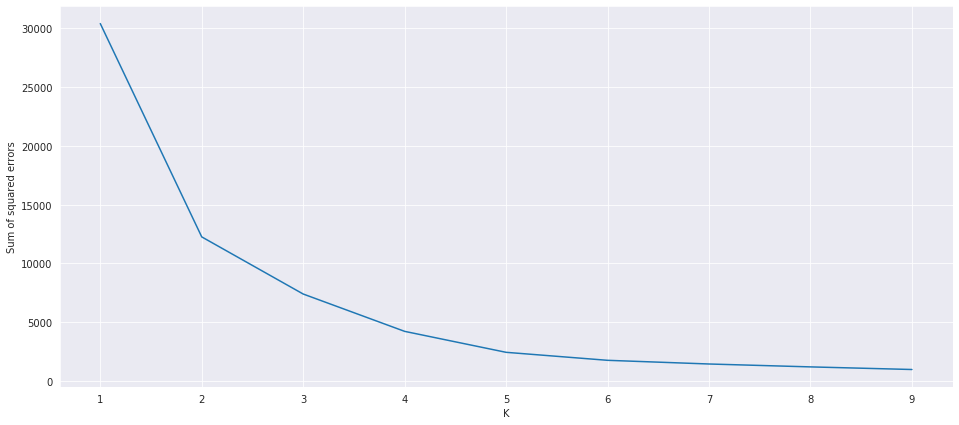

In [33]:
sns.lineplot(x =range(1,10), y =squ_err,)
plt.xlabel('K')
plt.ylabel('Sum of squared errors')

From that plot, we have elbow =4, which is already we have chosen.

## 6.4 Prepare a separate Data frame to show which stocks belong to the same cluster

In [34]:
clustered_stocks = df_return
clustered_stocks[:10]

,Companies,Annual % returns,Annual % volatility,Cluster
0,ADANIPORTS,7.120047,30.906499,1
1,ASIANPAINT,10.124850,20.919339,1
2,BPCL,-25.036432,43.573269,0
3,GAIL,-5.255090,33.808128,0
4,ITC,6.401437,22.363628,1
5,IOC,-39.638575,49.900680,3
6,INFRATEL,-12.418651,30.571247,0
7,HINDALCO,4.933316,33.522895,1
8,MARUTI,1.019504,22.502943,1
9,TCS,8.046956,43.094940,1


In [35]:
clustered_stocks.to_csv('Clustered_Stocks')